In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns

In [3]:
url = "https://raw.githubusercontent.com/JangirSumit/kmeans-clustering/refs/heads/master/driver-data.csv"
df = pd.read_csv(url)
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
points = pd.DataFrame({"x":df.mean_dist_day , "y": df.mean_over_speed_perc})
k = 4
centroids = points.sample(n = k , replace = False).reset_index(drop= True)
print(f"{points=} \n {centroids=}")
print(f"{points.x.dtype} , {points.y.dtype}")

points=           x   y
0      71.24  28
1      52.53  25
2      64.54  27
3      55.69  22
4      54.58  25
...      ...  ..
3995  160.04  10
3996  176.17   5
3997  170.91  12
3998  176.14   5
3999  168.03   9

[4000 rows x 2 columns] 
 centroids=       x   y
0  49.72   4
1  61.69  36
2  58.05   5
3  61.28   6
float64 , int64


In [5]:
centroids

,x,y
0,49.72,4
1,61.69,36
2,58.05,5
3,61.28,6


<Axes: xlabel='x', ylabel='y'>

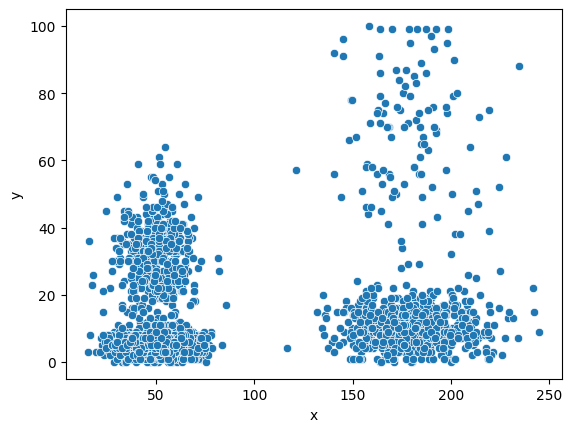

In [6]:
sns.scatterplot(points , x = 'x' , y = 'y')

In [7]:
def calcEuclid(p1 , p2):
    p1 = np.array(p1).reshape(1 , -1)
    p2 = np.array(p2).reshape(1 , -1)
    # print(f"{p1=} , {p2=}")
    return euclidean_distances(p1 , p2)[0][0]

In [8]:
def kmean(points , k , maxiter = 5):
    centroids = points.sample(n = k , replace = False).reset_index(drop= True)
    points = pd.DataFrame(points)
    # points['distance'] = float('inf')
    points['cluster'] = -1
    for iter in range(maxiter):
        for i , point in points.iterrows():
            distances = [calcEuclid((point.x , point.y) , (centroid.x , centroid.y)) for _ , centroid in centroids.iterrows()]
            cluster = np.argmin(distances)
            points.loc[i , 'cluster'] = cluster
        # print(f"{points}")
        # update centroids:
        centroids = points.groupby('cluster')[['x' , 'y']].mean()
        # print(f"{centroids=}")
    return points
# kmean(points , 4 , 5)

<Axes: xlabel='x', ylabel='y'>

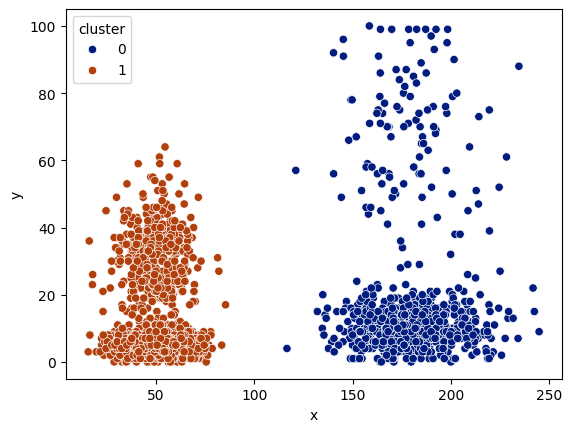

In [9]:
res = kmean(points , 2 , 10)
sns.scatterplot(res , x = 'x' , y = 'y' , hue = 'cluster' , palette = 'dark')

<Axes: xlabel='x', ylabel='y'>

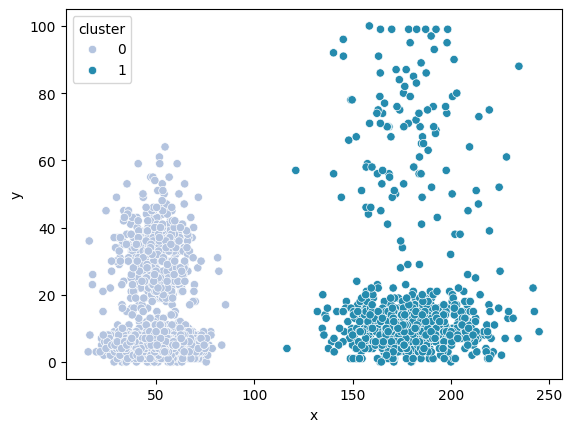

In [10]:
res = kmean(points , 2 , 10)
sns.scatterplot(res , x = 'x' , y = 'y' , hue = 'cluster' , palette = 'PuBuGn')

Best k: 4


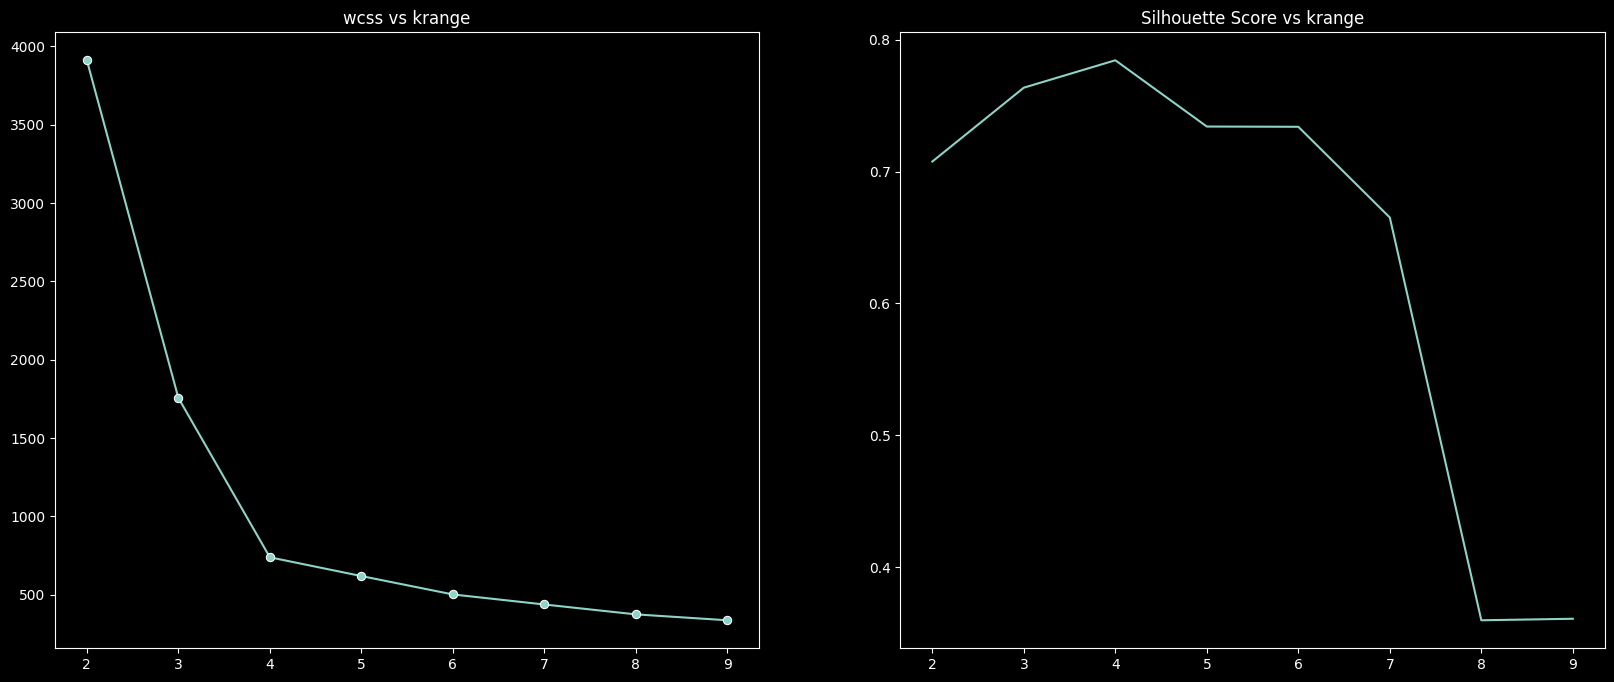

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
plt.style.use('dark_background')


scaler = StandardScaler()
xs = scaler.fit_transform(points)

wcss = []
silhouettes = []
krange = range(2 , 10)

for k in krange:
    kmean = KMeans(n_clusters=k , random_state=42 , n_init=10)
    kmean.fit(xs)
    wcss.append(kmean.inertia_)
    silhouettes.append(silhouette_score(xs, kmean.labels_))

bestk = krange[silhouettes.index(max(silhouettes))]
print(f"Best k: {bestk}")

colors = pd.cut(wcss , bins= 3 , labels = ['low' , 'medium' , 'high'])

# Elbow Method
fig = plt.figure(figsize=(20,8))

plt.subplot(1 , 2, 1)
sns.lineplot(x = krange , y = wcss , marker = "o")
plt.title('wcss vs krange')


plt.subplot(1 ,2 , 2)
sns.lineplot(x = krange , y = silhouettes)
plt.title('Silhouette Score vs krange')
plt.show()

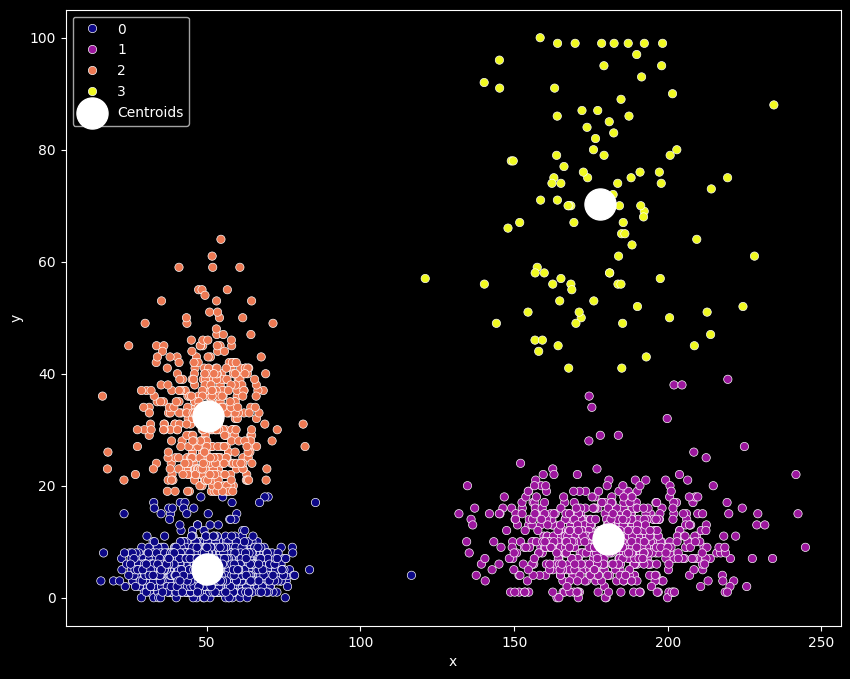

In [12]:
kmean = KMeans(n_clusters= bestk , random_state= 42 , n_init= 10)
clusters = kmean.fit_predict(xs)

clusterCenters = scaler.inverse_transform(kmean.cluster_centers_)
plt.figure(figsize = (10,8))
sns.scatterplot(data = points , x= 'x' , y = 'y' , hue = clusters , palette = 'plasma')
plt.scatter(x = clusterCenters[:, 0] , y = clusterCenters[: , 1] , color = 'white' , marker = 'o' ,s = 500 , label = 'Centroids')
plt.legend()
plt.show()

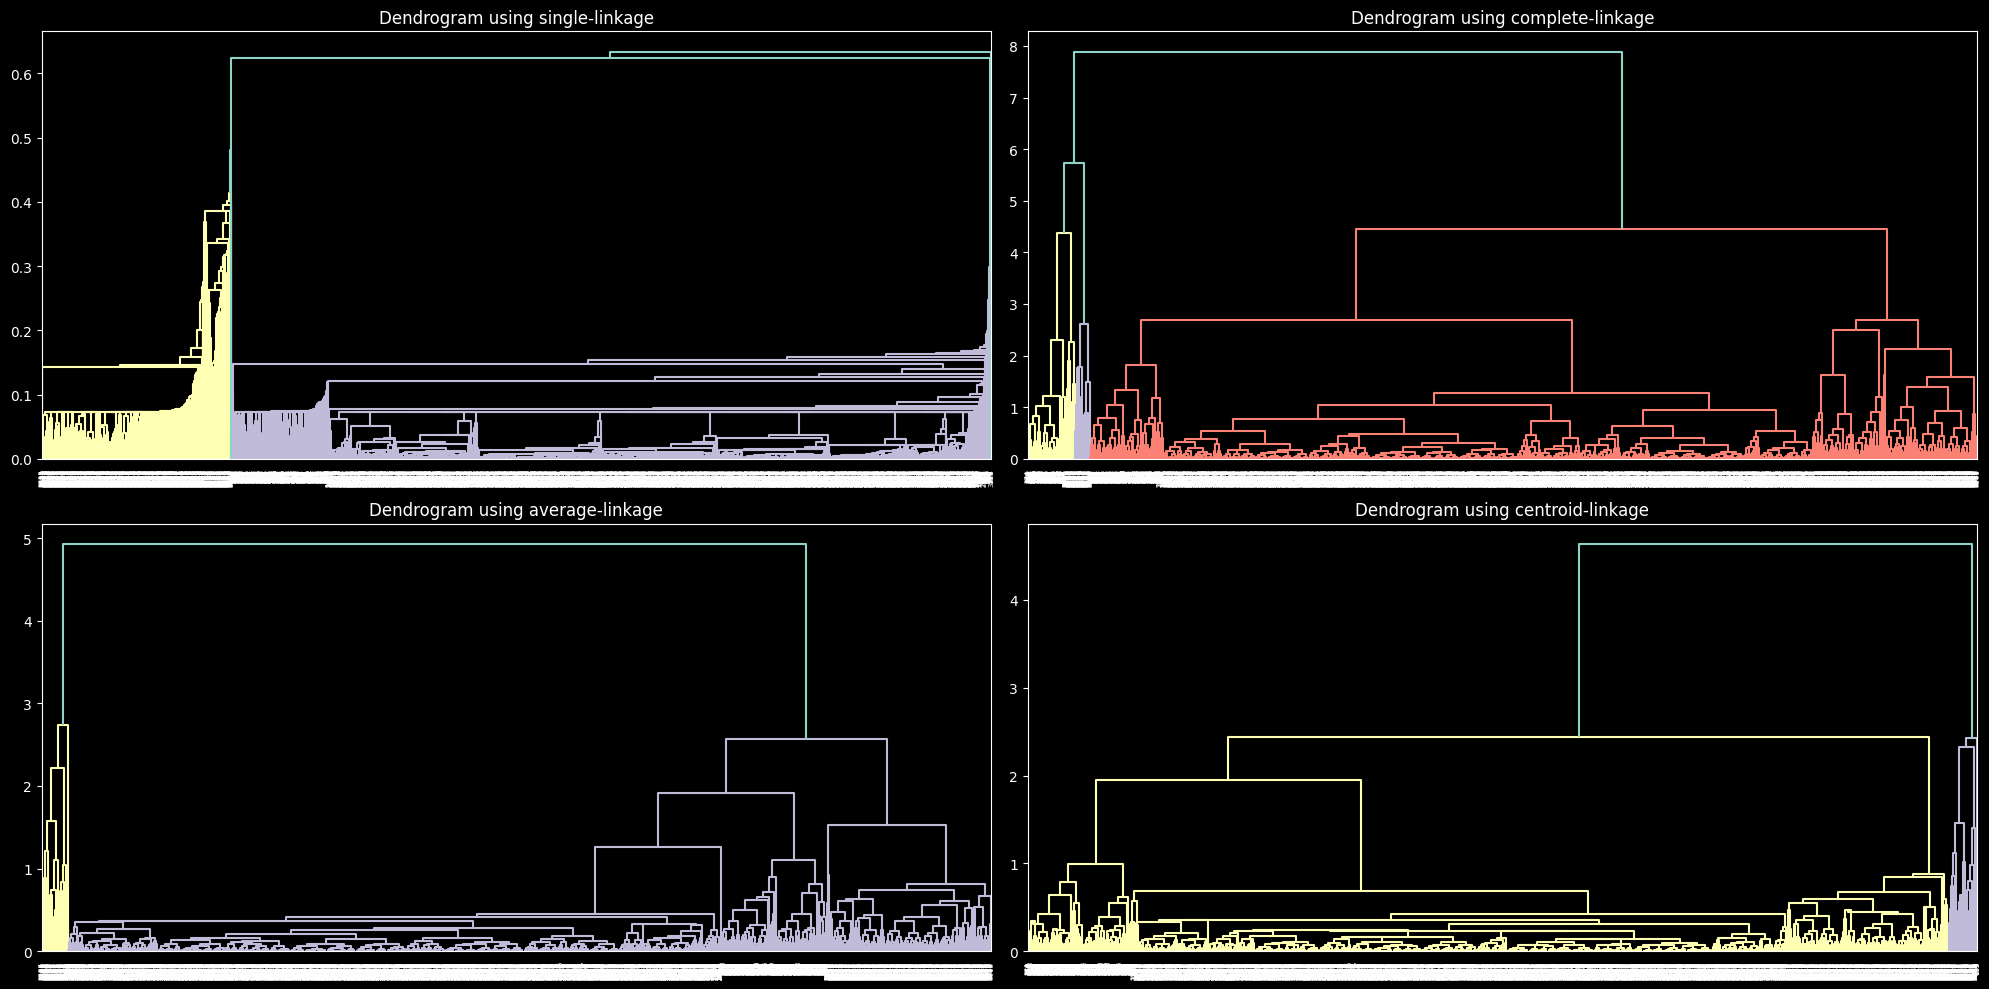

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch


# Linkage methods to analyze
linkage_methods = ['single', 'complete', 'average', 'centroid']

# Plotting dendrograms
plt.figure(figsize=(20, 10))
for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i + 1)
    #linked = linkage(X_scaled[:100], method=method) #Took only subset of data
    linked = linkage(xs, method=method) #Took only subset of data
    dendrogram(linked,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True)
    plt.title(f'Dendrogram using {method}-linkage')
plt.tight_layout()
plt.show()



## Clusturing on text data:


In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

analyzer = SentimentIntensityAnalyzer()

df = pd.read_csv('./data/trainTweets.csv' ,header = None , names = ['id' , 'sentiment' , 'tweet'] , encoding= 'latin1')
df = df.iloc[1:]
df

FileNotFoundError: [Errno 2] No such file or directory: './data/trainTweets.csv'

In [ ]:
tweets = df['tweet']
ts = []
for tweet in tweets:
    ps = analyzer.polarity_scores(tweet)
    ts.append({
        "tweet":tweet,
        "compound":ps['compound']
    })

tdf = pd.DataFrame(ts)
tdf.head()

,tweet,compound
0,"@RailMinIndia My PNR is 8348062961, I am in wa...",-0.4767
1,@sureshpprabhu @RailMinIndia AC not working in...,-0.2235
2,@RailMinIndia I'm traveling to chennai by trai...,0.0000
3,@RailMinIndia irctc is not responding at the t...,0.0000
4,@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,0.0258


In [ ]:
sentiment = []
for score in tdf['compound']:
    if score > 0:
        sentiment.append('positive')
    elif score < 0:
        sentiment.append('negative')
    else:
        sentiment.append('neutral')
tdf['sentiment'] = sentiment
tdf.head()

,tweet,compound,sentiment
0,"@RailMinIndia My PNR is 8348062961, I am in wa...",-0.4767,negative
1,@sureshpprabhu @RailMinIndia AC not working in...,-0.2235,negative
2,@RailMinIndia I'm traveling to chennai by trai...,0.0000,neutral
3,@RailMinIndia irctc is not responding at the t...,0.0000,neutral
4,@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,0.0258,positive


In [ ]:
import nltk
nltk.download(['punkt' , 'stopwords' , 'punkt_tab'])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sanketmishra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanketmishra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sanketmishra/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import re
# Text preprocessing
stop_words = stopwords.words('english')
processed_tweets = []

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'https?://\S+', '', text)  # Remove URLs

    # Tokenize text
    tokens = word_tokenize(text)

    # Filter out stopwords
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Join tokens back into string
    return ' '.join(filtered_tokens).strip()

# Process all tweets
for tweet in tweets:
    processed_tweets.append(preprocess_text(tweet))

# Feature extraction using Count Vectorizer
vectorizer = CountVectorizer(binary=False, min_df=2, ngram_range=(1, 2))
cv_result = vectorizer.fit_transform(processed_tweets)

# Display feature matrix dimensions
print("\nFeature Extraction Results:")
print(f"Dimension after Count Vectorizer: {cv_result.shape}")


Feature Extraction Results:
Dimension after Count Vectorizer: (1366, 3346)


<Axes: >

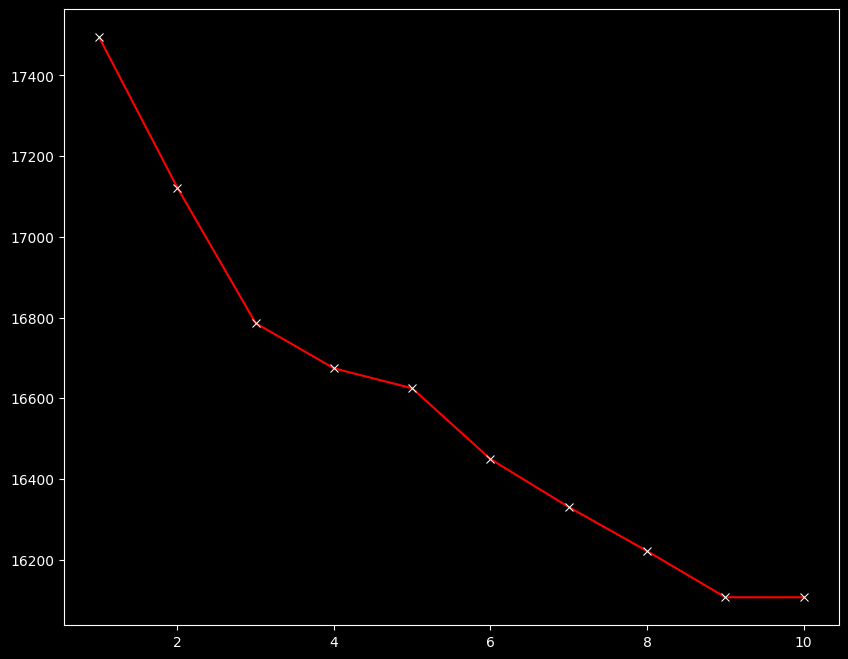

In [ ]:
# perform elbow method to get the best k value:

x = cv_result
wcss = []
silhouettes = []
krange = range(1 , 11)

for k in krange:
    kmean = KMeans(n_clusters= k , random_state= 42 , n_init= 10)
    kmean.fit(x)
    wcss.append(kmean.inertia_)
    # silhouettes.append(silhouette_score(x , kmean.labels_))

fig = plt.figure(figsize = (10 , 8))
sns.lineplot(x = krange , y = wcss , marker = 'x' , color = 'red')

In [ ]:
from collections import Counter
k = 4
kmean = KMeans(n_clusters= k , random_state= 42)
clusters = kmean.fit_predict(x)
tdf['cluster'] = clusters

print(f"{Counter(clusters)}")

for i in range(k):
    print(f"Tweets belonging to cluster: {i}")
    ctweets = tdf[tdf['cluster'] == i]['tweet'].sample(n = min(5 , (tdf['cluster'] == i).sum()), replace = False)
    for tweet in ctweets:
        print(tweet)
    print("*"*400)

Counter({2: 1166, 3: 183, 1: 15, 0: 2})
Tweets belonging to cluster: 0
@RailMinIndia 15 tatkal agents are in front of me at nagpur railway station. Vo kisi aur ke naam pe ticket nikal rahe hai. Plz help
@sureshpprabhu @RailMinIndia New bongaigaon,assam railway station clean railway station https://t.co/gkEE02U6CS
****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
Tweets belonging to cluster: 1
@RailMinIndia Sir today i have gone to Palam Ticket Counter and ask for 3 ticket on different date they told me 1 ticket is issued for one
@RailMinIndia @PiyushGoyal If a person buys ticket online and if its not confirmed then why that ticket is not a v

2

In [ ]:
def fib(n):
    if(n == 0):return 0
    if(n == 1):return 1
    return fib(n-1) + fib(n-2)

fib(7)

13

In [ ]:
%%timeit
def pr(a , n):
    if(n == 0):return 1
    if(n==1):return a
    if(n & 1):return a * pr(a , n - 1)
    el = pr(a , n/2)
    return el * el

pr(2 , 3)

228 ns ± 7.65 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [ ]:
%%timeit
def pr(a , n):
    if(n == 0):return 1
    if(n == 1):return a
    el = pr(a , n//2)
    if(n & 1):return a * el * el
    return el * el

pr(2 , 3)

143 ns ± 2.35 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [ ]:
def pr(a , n):
    if(n == 0):return 1
    if(n == 1):return a
    el = pr(a , n//2)
    if(n & 1):return a * el * el
    return el * el

32

In [ ]:
pr(2 , 9)

512

# Clusturing on tweets(text data):

repeat


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
import re


plt.style.use('dark_background')

In [21]:
df = pd.read_csv('../data/trainTweets.csv' , skiprows=1 ,  names = ['id' , 'sentiment' , 'tweet'] , encoding = 'latin-1')
df.head()

,id,sentiment,tweet
0,1,0,"@RailMinIndia My PNR is 8348062961, I am in wa..."
1,2,0,@sureshpprabhu @RailMinIndia AC not working in...
2,3,0,@RailMinIndia I'm traveling to chennai by trai...
3,4,5,@RailMinIndia irctc is not responding at the t...
4,5,7,@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...


In [34]:
tweets = df['tweet'].to_list()


tws = []
for i , tweet in enumerate(tweets):
    tws.append({'tweet':tweet , "score": analyzer.polarity_scores(tweet)['compound']})

sentiments = []
for tweet in tws:
    score = tweet['score']
    if score > 0:
        sentiments.append('positive')
    elif score < 0:
        sentiments.append('negative')
    else:
        sentiments.append('neutral')
tdf = pd.DataFrame(tws)
tdf['sentiment'] = sentiments
dist = tdf.groupby('sentiment')['score'].count()

print(f'{dist=} , {tdf.info()=}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366 entries, 0 to 1365
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet      1366 non-null   object 
 1   score      1366 non-null   float64
 2   sentiment  1366 non-null   object 
dtypes: float64(1), object(2)
memory usage: 32.1+ KB
dist=sentiment
negative    553
neutral     360
positive    453
Name: score, dtype: int64 , tdf.info()=None


In [47]:
# text processing:


stop_wrods = set(stopwords.words('spanish'))

def preprocess(text):
    text = text.lower()

    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'https?://\S+', '', text)

    tokens = word_tokenize(text)

    # remove stop words
    ftokens = [token for token in tokens if token not in stop_wrods]

    return ' '.join(ftokens)


processed_tweets = []

for tweet in tdf['tweet']:
    processed_tweets.append(preprocess(tweet))

processed_tweets[:5]

['railminindia my pnr is 8348062961 i am in way but there is water in toilet and mess is everywhere in coach please provide basic facil',
 'sureshpprabhu railminindia ac not working in prayag lucknow intercity today which departed from prayag at 345 pmstaff not helping us',
 'railminindia im traveling to chennai by train 16102 coach s446 my berth is very dirtysome one vomitted on the birth',
 'railminindia irctc is not responding at the time of tatkal booking',
 'drmbhopal railminindia sanjaygupta2012 drmncrald matter notified to concerned official bhusavaldivn']

In [60]:
# create embeddings of the tweets

vectorizer = TfidfVectorizer()
tmat = vectorizer.fit_transform(processed_tweets)

print(f'dimentions of tmat: {tmat.shape}')

dimentions of tmat: (1366, 5371)


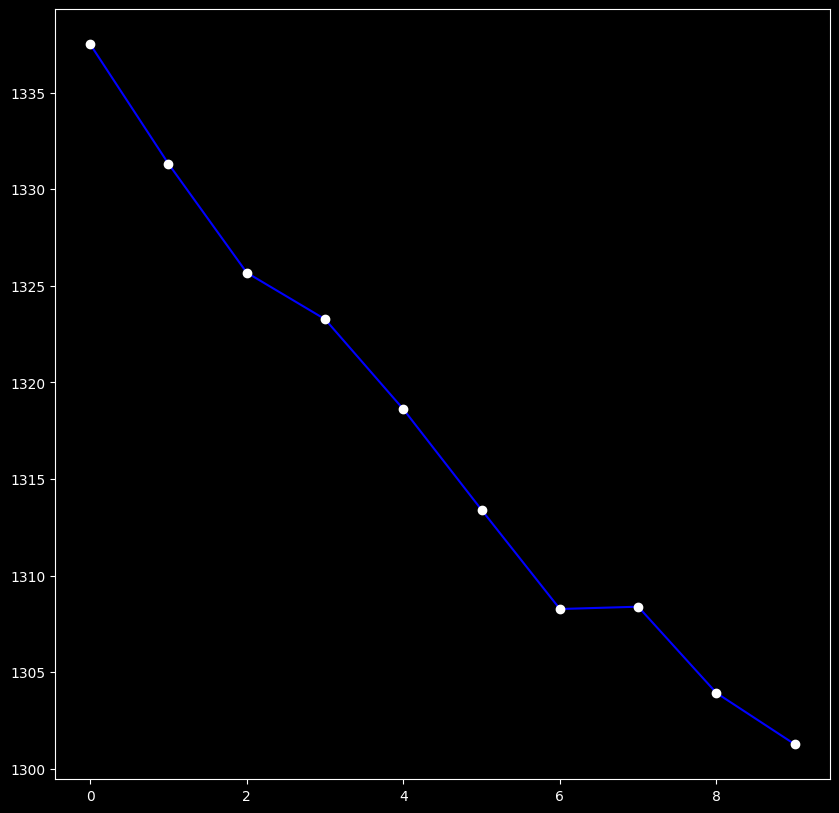

In [67]:
# perform the infamous elbow method:

inertia = []
for k in range(1 , 11):
    model = KMeans(n_clusters= k , random_state= 42)
    model.fit(tmat)
    inertia.append(model.inertia_)


plt.figure(figsize = (10 , 10))
sns.lineplot(inertia , color = 'blue')
plt.plot(inertia , 'o' , color = 'white')

In [87]:
# select optimal clusters and perform kmeans

ok = 4
model = KMeans(n_clusters= ok , random_state= 42)
clusters = model.fit_predict(tmat)

df = pd.DataFrame({'tweets':tweets , 'cluster' : clusters})
df

,tweets,cluster
0,"@RailMinIndia My PNR is 8348062961, I am in wa...",2
1,@sureshpprabhu @RailMinIndia AC not working in...,2
2,@RailMinIndia I'm traveling to chennai by trai...,2
3,@RailMinIndia irctc is not responding at the t...,3
4,@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,2
...,...,...
1361,@RailMinIndia An aged lady has been alloted up...,1
1362,"aggressive copassengers, need of immediate cha...",3
1363,@RailMinIndia no water in coach...please do so...,2
1364,@RailMinIndia @sureshpprabhu While travelling ...,2


In [90]:
gdf = df.groupby('cluster')['tweets']
for gname , group in gdf:
    print(gname)
    for i , text in enumerate(group[:10]):
        print(f"{i}: {text}")

0
0: @RailMinIndia If you can't give justice to graduate engineers then just do one thing at least. Stop recruiting B. Tech. as SSE.
1: @sureshpprabhu @RailMinIndiaPlz wrkout smthng tht cn hlp trains to run on right time.Malwa exprs delayed more than 3 hrs @ Mathura junction
2: Enter to win $150 Amazon Gift Card! #Books #PNR #UrbanFantasy #Romance https://t.co/jBfXzDe7P2
3: @RailMinIndia @sureshpprabhu my reserved ticket was been allotted to RAC passenger as we boarded from next station. Kindly please help ??
4: The Google i1 button is used 5 billion times pnr day. (source: AllTwitter)
5: @sureshpprabhu  @RailMinIndia student's pnr 2119025096 Not confirmed Tkt counter@ Raeberali denying refund sayin  he is late to reach window
6: @RailMinIndia hello sir I want going to village, I have no money buy of ticket .what i do plz help me
7: @RailMinIndia @sureshpprabhu My bro lost his luggage, luks like by rail officials at dindigul station. PNR:4840503630,ph. 9994437217,pl help
8: @RailMinInd

# Clusturing on Image data:


In [92]:
from keras.datasets import fashion_mnist
(xtrain , ytrain) , (xtest , ytest) = fashion_mnist.load_data()
xtrain.shape , ytrain.shape , xtest.shape , ytest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

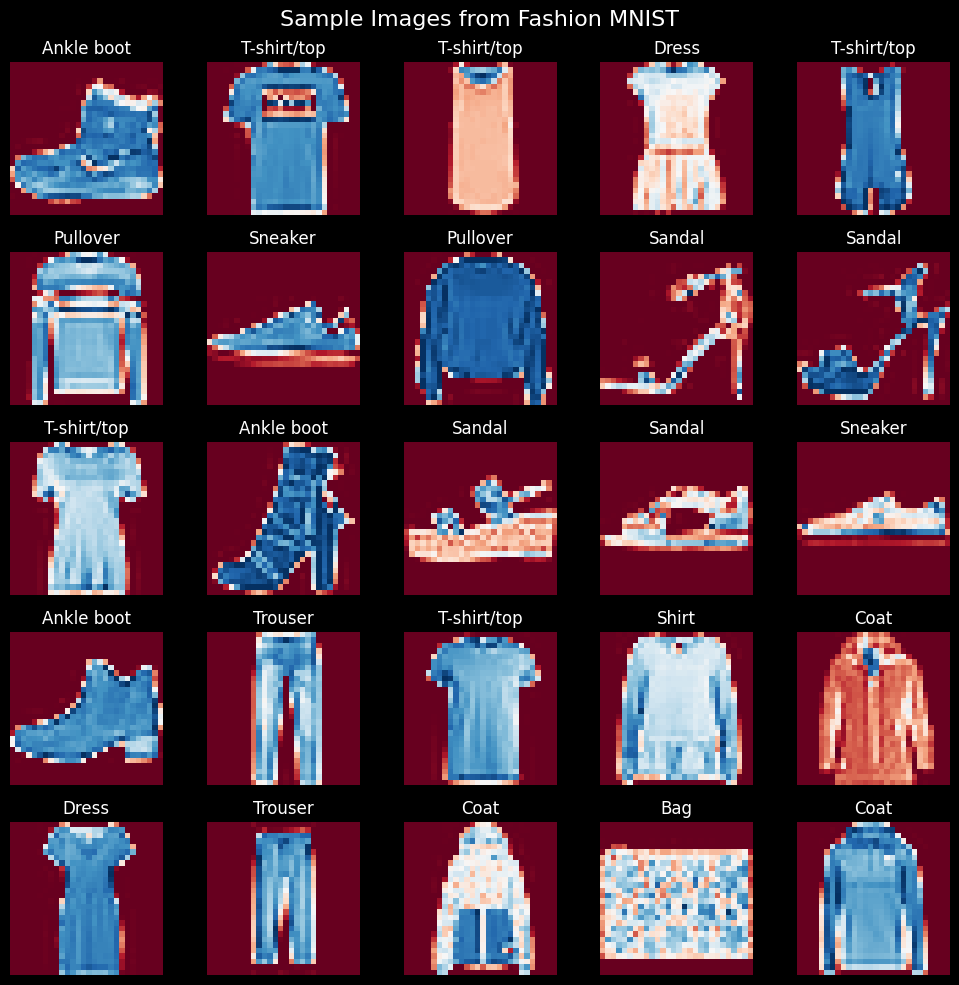

In [102]:
# plot a few images:
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize = (10 , 10))
for i in range(25):
    plt.subplot(5 , 5 , i + 1)
    plt.imshow(xtrain[i], cmap = 'RdBu')
    plt.title(label_names[ytrain[i]])
    plt.axis('off')

plt.suptitle("Sample Images from Fashion MNIST", fontsize=16)
plt.tight_layout()
plt.show()

(60000, 784) (60000, 28, 28)


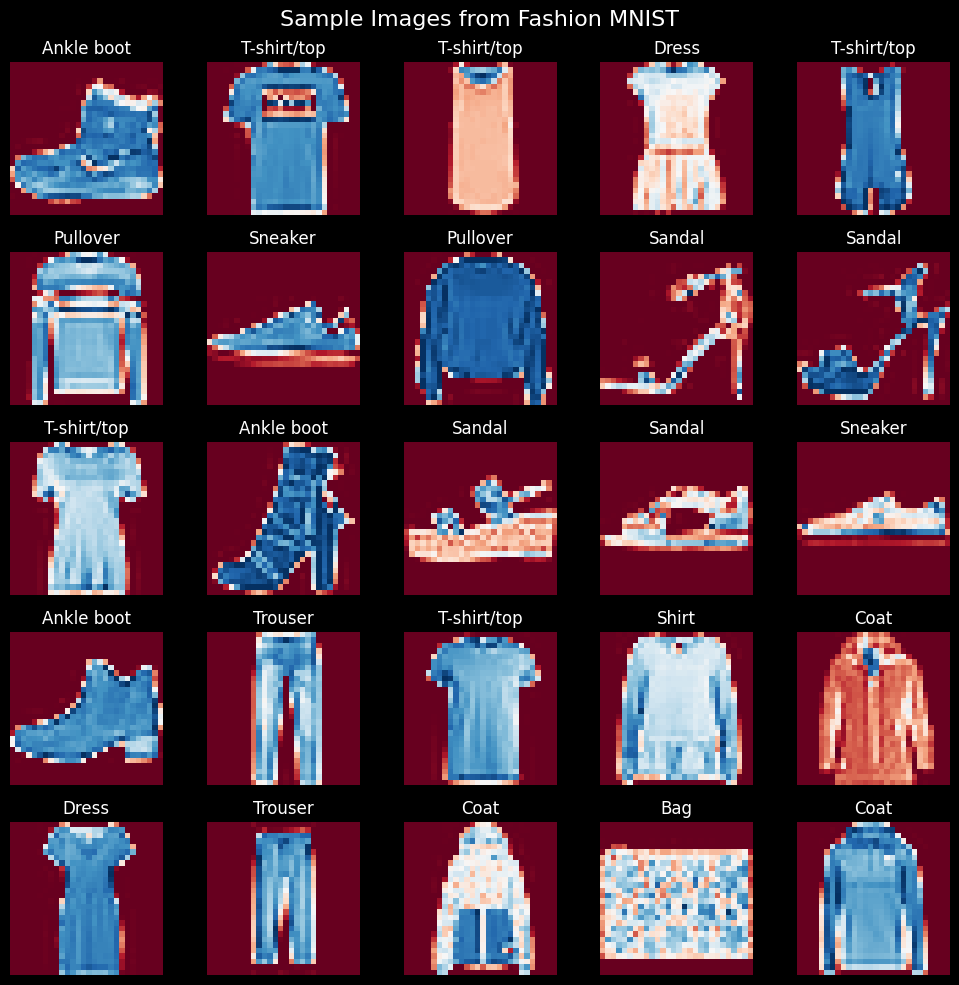

In [110]:
# reshape and normalize images
xtrainshaped = xtrain.reshape(-1 , 28 * 28)
xtestshaped = xtest.reshape(-1 , 28 * 28)

# normalize
xtrainnorm = xtrain.reshape(-1 , 28 * 28) / 255
xtestnorm = xtest.reshape(-1 , 28 * 28) / 255
print(xtrainshaped.shape , xtrain.shape)

# visualize normalized images
plt.figure(figsize = (10 , 10))
for i in range(25):
    plt.subplot(5 , 5 , i + 1)
    plt.imshow(xtrainnorm[i].reshape(-1 , 28), cmap = 'RdBu')
    plt.title(label_names[ytrain[i]])
    plt.axis('off')

plt.suptitle("Sample Images from Fashion MNIST", fontsize=16)
plt.tight_layout()
plt.show()

In [113]:
# perform kmeans
model = KMeans(n_clusters=10 , random_state= 42)
clusters = model.fit_predict(xtrainnorm , ytrain)

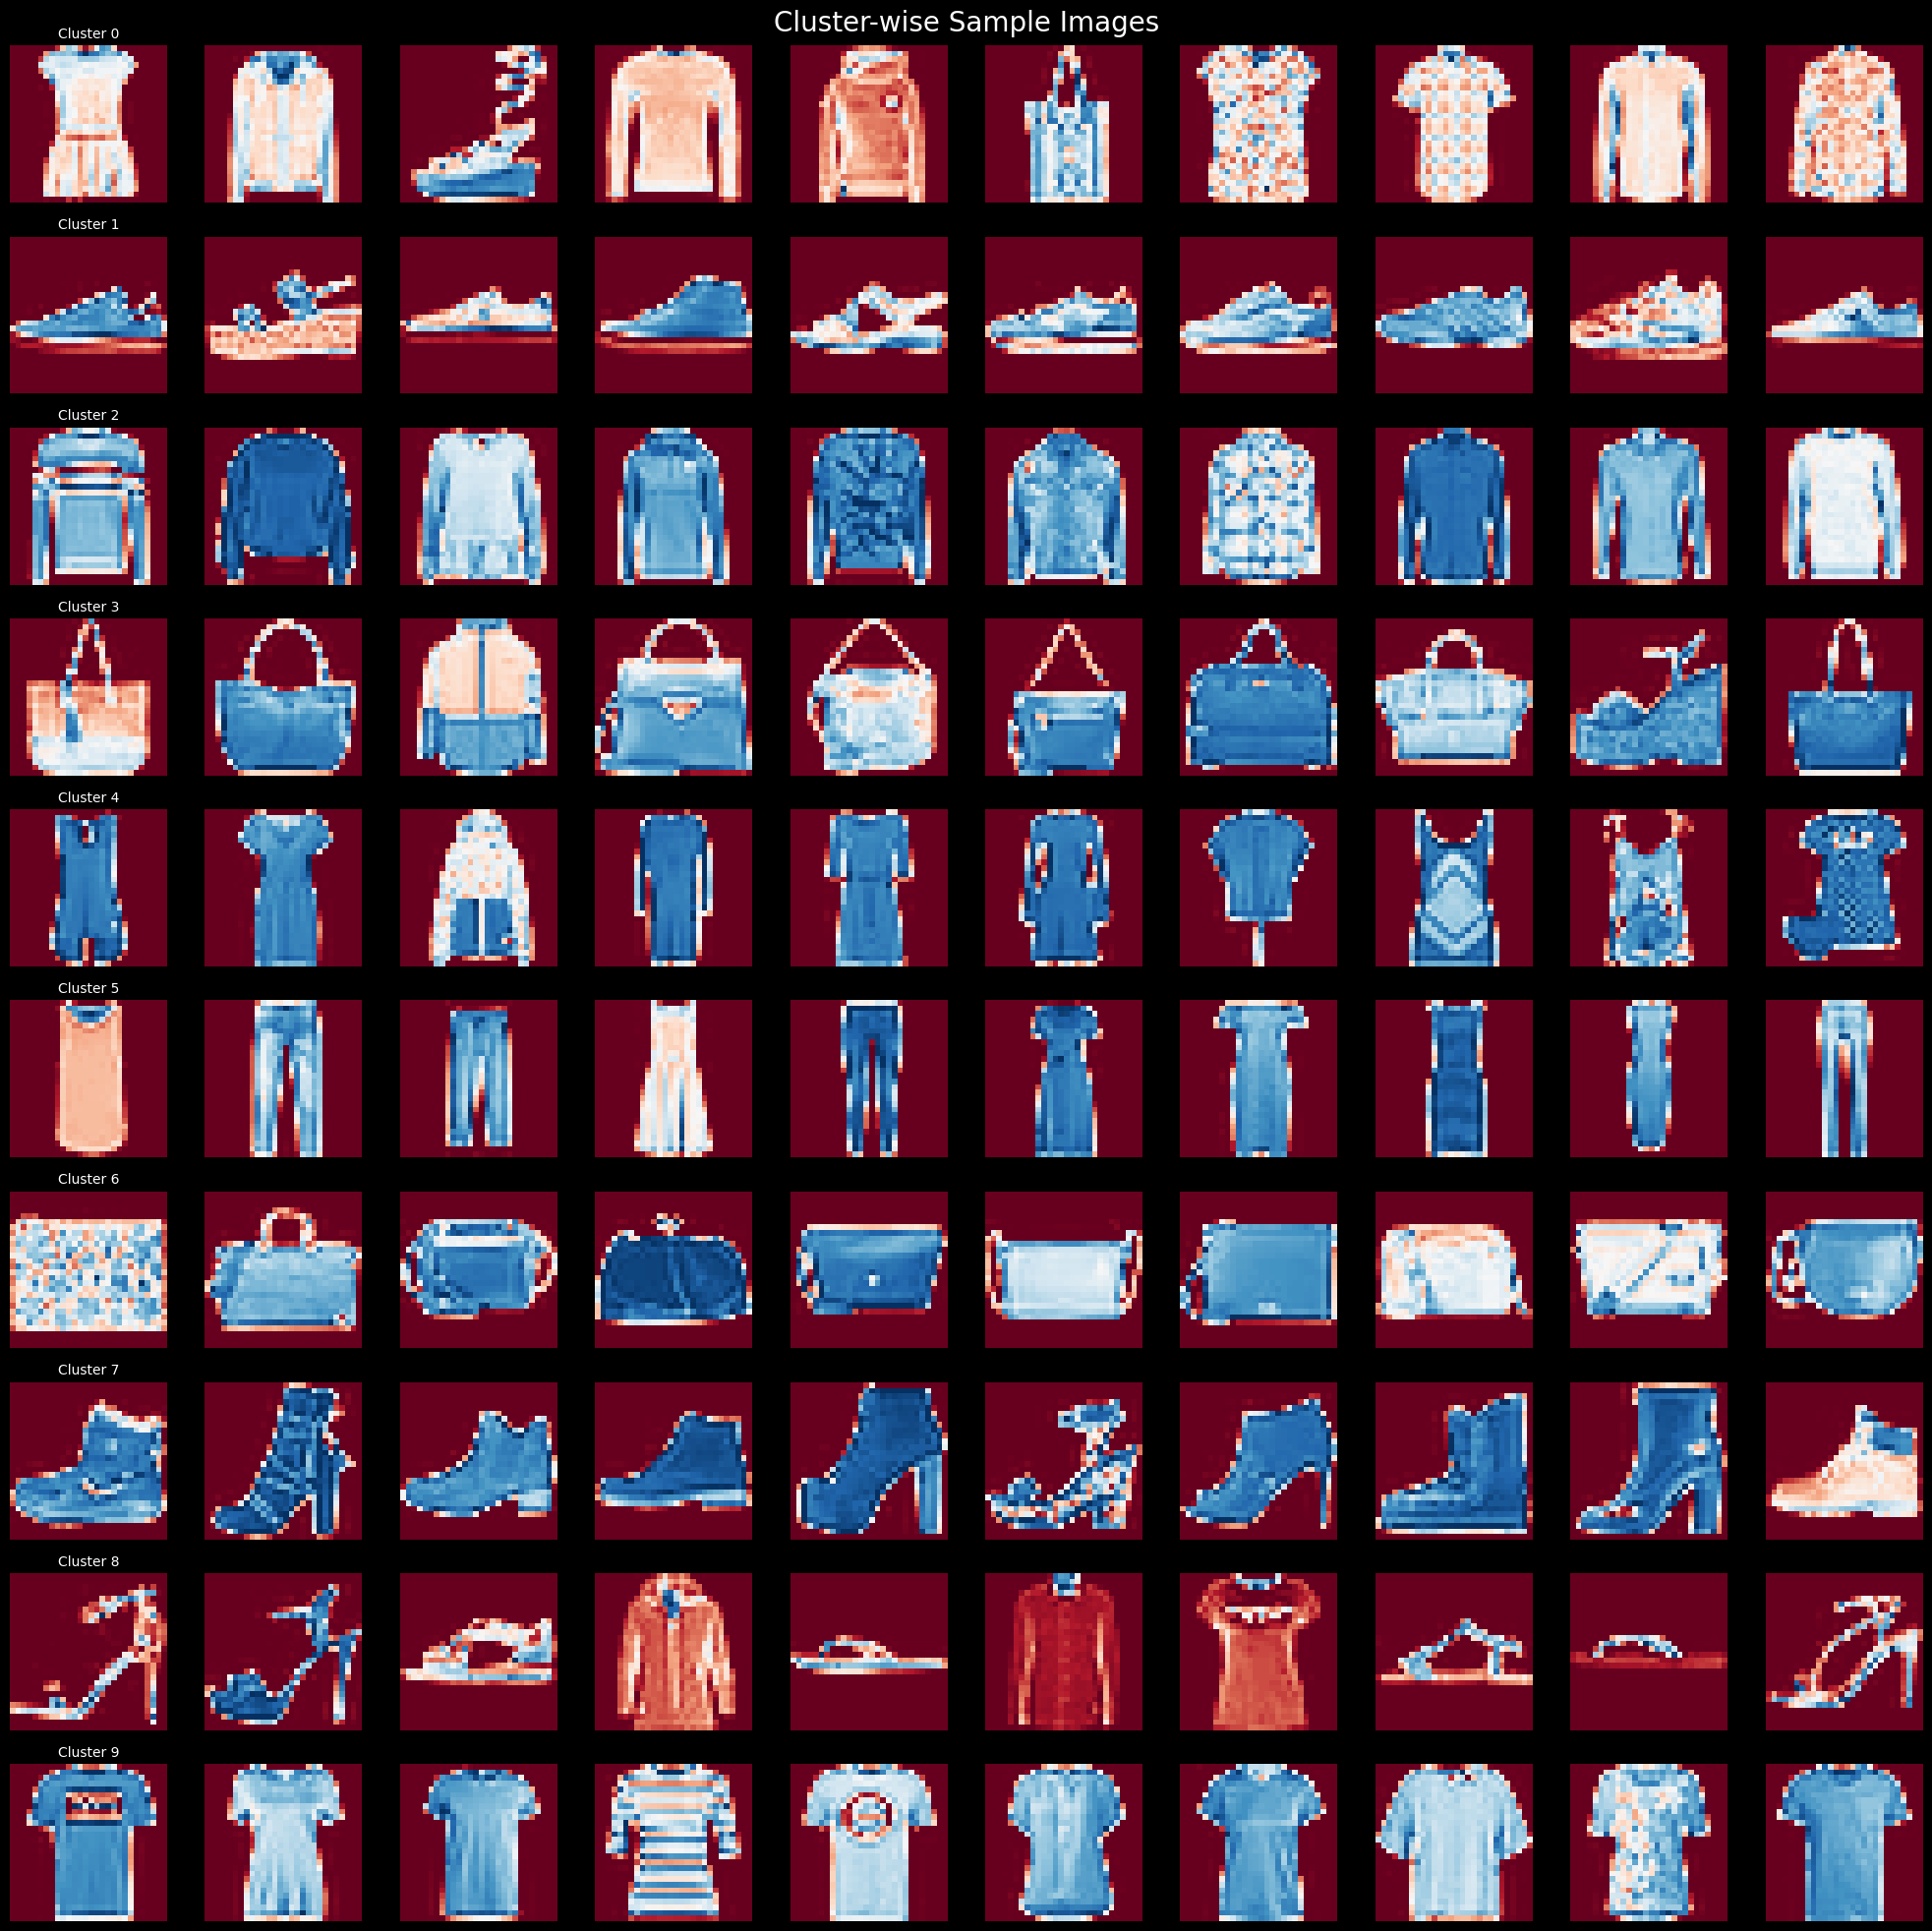

In [123]:
# print 10 images from each predicted cluster
plt.figure(figsize= (20 , 20))
for cluster in range(10):
    mask = np.where(clusters == cluster)[0][:10]
    for i , id in enumerate(mask):
        plt.subplot(10 , 10 , 10 * cluster + i + 1)
        plt.imshow(xtrainnorm[id].reshape(-1 , 28) , cmap = 'RdBu')
        plt.axis('off')
        if i == 0:
            plt.title(f"Cluster {cluster}", fontsize=10)
plt.suptitle("Cluster-wise Sample Images", fontsize=20)
plt.tight_layout()
plt.show()